In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

print('Modules imported successfully!')

Modules imported successfully!


In [2]:
#Import Datasets 
train_df = pd.read_csv("TRAIN.csv")
train_df.set_index('ID', inplace=True)

train_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
ID,,,,,,,,,
T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
test_df = pd.read_csv("TEST_FINAL.csv")
test_df.set_index('ID', inplace=True)
test_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
ID,,,,,,,
T1188341,171,S4,L2,R3,2019-06-01,0,No
T1188342,172,S1,L1,R1,2019-06-01,0,No
T1188343,173,S4,L2,R1,2019-06-01,0,No
T1188344,174,S1,L1,R4,2019-06-01,0,No
T1188345,170,S1,L1,R2,2019-06-01,0,No


In [4]:
train_df.shape

(188340, 9)

In [5]:
test_df.shape

(22265, 7)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188340 entries, T1000001 to T1188340
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store_id       188340 non-null  int64  
 1   Store_Type     188340 non-null  object 
 2   Location_Type  188340 non-null  object 
 3   Region_Code    188340 non-null  object 
 4   Date           188340 non-null  object 
 5   Holiday        188340 non-null  int64  
 6   Discount       188340 non-null  object 
 7   #Order         188340 non-null  int64  
 8   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22265 entries, T1188341 to T1210605
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store_id       22265 non-null  int64 
 1   Store_Type     22265 non-null  object
 2   Location_Type  22265 non-null  object
 3   Region_Code    22265 non-null  object
 4   Date           22265 non-null  object
 5   Holiday        22265 non-null  int64 
 6   Discount       22265 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [8]:
train_df.isnull().sum()

Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [9]:
test_df.isnull().sum()

Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

<AxesSubplot:xlabel='Location_Type'>

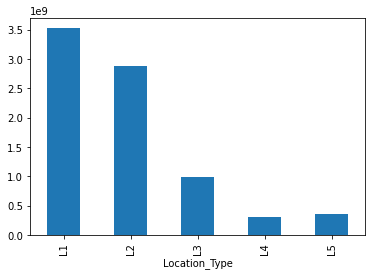

In [10]:
train_df.groupby(['Location_Type'])['Sales'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='Store_Type', ylabel='count'>

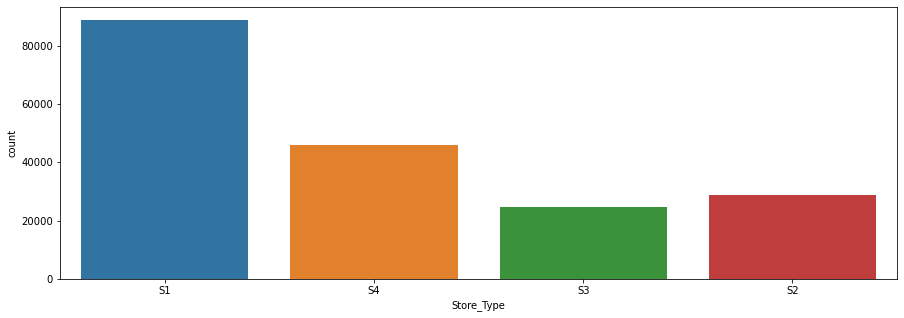

In [11]:
plt.figure(figsize=(15,5))
sns.countplot('Store_Type', data = train_df)

<AxesSubplot:xlabel='Location_Type', ylabel='count'>

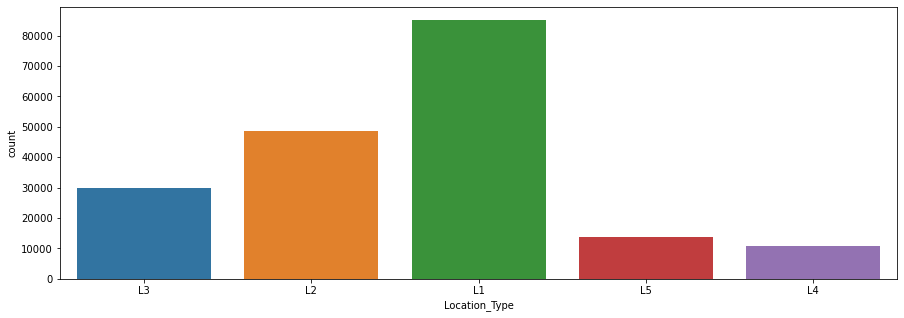

In [12]:
plt.figure(figsize=(15,5))
sns.countplot('Location_Type', data = train_df)

<AxesSubplot:xlabel='ID'>

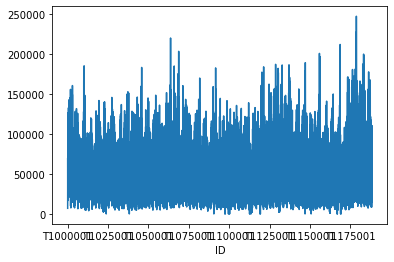

In [14]:
train_df["Sales"].plot()

In [16]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [17]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day

In [18]:
split_date(train_df)
split_date(test_df)

In [19]:
train_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day
ID,,,,,,,,,,,,
T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1
T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1
T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1
T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1
T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1


In [20]:
test_df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Year,Month,Day
ID,,,,,,,,,,
T1188341,171,S4,L2,R3,2019-06-01,0,No,2019,6,1
T1188342,172,S1,L1,R1,2019-06-01,0,No,2019,6,1
T1188343,173,S4,L2,R1,2019-06-01,0,No,2019,6,1
T1188344,174,S1,L1,R4,2019-06-01,0,No,2019,6,1
T1188345,170,S1,L1,R2,2019-06-01,0,No,2019,6,1


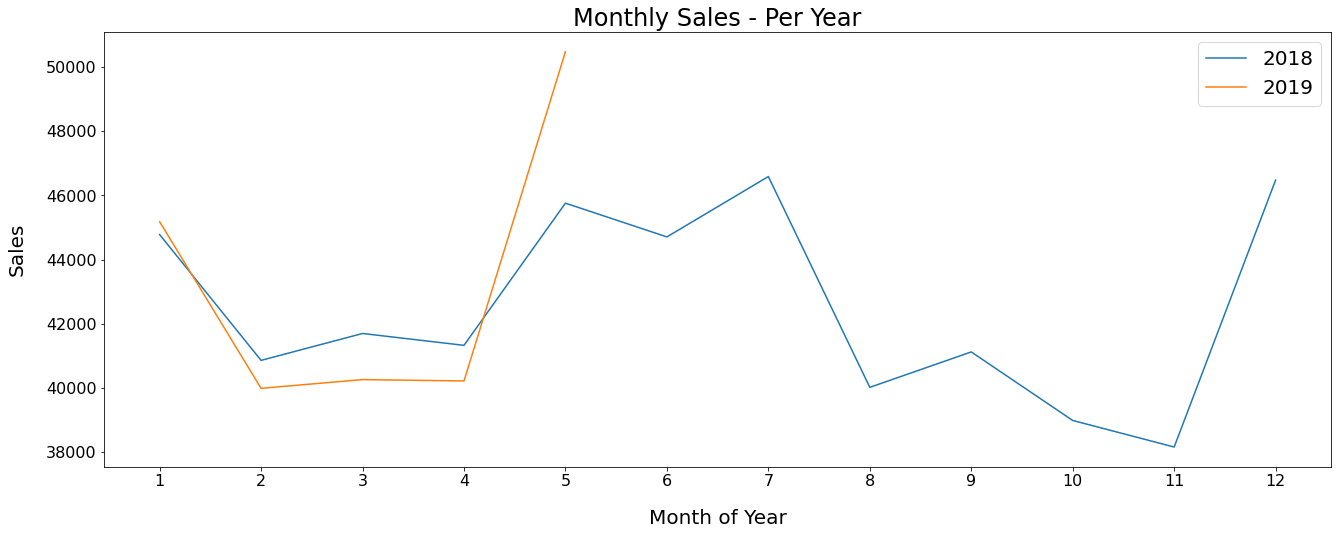

In [21]:
Monthly_sales_2018 = train_df[train_df.Year==2018].groupby('Month')['Sales'].mean()
Monthly_sales_2019 = train_df[train_df.Year==2019].groupby('Month')['Sales'].mean()


plt.figure(figsize=(22,8))
plt.plot(Monthly_sales_2018.index, Monthly_sales_2018.values)
plt.plot(Monthly_sales_2019.index, Monthly_sales_2019.values)

plt.xticks(np.arange(1, 13, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Month of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Monthly Sales - Per Year", fontsize=24)
plt.legend(['2018', '2019'], fontsize=20);

#### PreProcessing

In [22]:
#Splitting the data
X = train_df.drop(columns=['Sales', '#Order', 'Date'])
y = train_df['Sales']

In [23]:
X_test = test_df.drop(columns=['Date'])

In [24]:
#Splitting the data into train and test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
#Required modules for the pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [26]:
numeric_features = ['Store_id', 'Holiday', 'Year', 'Month', 'Day']

categorical_features = ['Store_Type', 'Location_Type', 'Region_Code', 'Discount']

In [27]:
#Pipeline for transformation
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

In [28]:
#Pipeline for column transformation
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])

In [29]:
X.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month,Day
ID,,,,,,,,,
T1000001,1,S1,L3,R1,1,Yes,2018,1,1
T1000002,253,S4,L2,R1,1,Yes,2018,1,1
T1000003,252,S3,L2,R1,1,Yes,2018,1,1
T1000004,251,S2,L3,R1,1,Yes,2018,1,1
T1000005,250,S2,L3,R4,1,Yes,2018,1,1


In [30]:
#Function to train and get the score of the models
def oneForAll(preprocessor, models, name):
    n=0
    for model in models:
        pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (name[n], model)
        ])
        pipeline.fit(X,y)
        y_pred_train = pipeline.predict(X)
        y_pred_test = pipeline.predict(X_test)
        scores_train.append(mse(y, y_pred_train))
        #scores_test.append(lmse(X_test, y_pred_test))
        n=n+1

In [31]:
import xgboost as xgb

In [32]:
xg = xgb.XGBRegressor()

In [33]:
#final preparation for fitting
#from sklearn.metrics import mean_squared_log_error as lmse
from sklearn.metrics import mean_squared_error as mse
models = [xg]
name = ['XGBoost']
scores_train=[]
scores_test=[]

In [34]:
#Calling the function
oneForAll(preprocessor, models, name)

In [35]:
#Models and scores  on train and test
models = pd.DataFrame({
    'Model': name,
    'Train Score': scores_train,
    #'Test Score': scores_test
    })

models.sort_values(by='Train Score')

,Model,Train Score
0,XGBoost,5.817607e+07


In [ ]:
#pipeline = Pipeline(prepocessor.transform(X_test))

In [36]:
data = preprocessor.transform(X_test)

In [37]:
data

array([[-0.1138887 , -0.38959686,  1.55474067, ...,  1.        ,
         2.        ,  0.        ],
       [-0.10439797, -0.38959686,  1.55474067, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09490725, -0.38959686,  1.55474067, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.01898145, -0.38959686,  1.55474067, ...,  0.        ,
         2.        ,  1.        ],
       [-1.08194265, -0.38959686,  1.55474067, ...,  0.        ,
         3.        ,  0.        ],
       [ 1.72731195, -0.38959686,  1.55474067, ...,  0.        ,
         1.        ,  0.        ]])